In [1]:
import tensorflow.compat.v1 as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [3]:

train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [4]:
X = tf.placeholder("float")
Y = tf.placeholder("float")
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

In [5]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [6]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [7]:
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.093851753 W= 0.32234225 b= 0.27811787
Epoch: 0100 cost= 0.091899671 W= 0.31801546 b= 0.30924448
Epoch: 0150 cost= 0.090173312 W= 0.3139461 b= 0.33851886
Epoch: 0200 cost= 0.088646494 W= 0.31011876 b= 0.36605287
Epoch: 0250 cost= 0.087296195 W= 0.30651885 b= 0.39194974
Epoch: 0300 cost= 0.086102068 W= 0.30313328 b= 0.41630542
Epoch: 0350 cost= 0.085046075 W= 0.29994905 b= 0.43921256
Epoch: 0400 cost= 0.084112182 W= 0.2969543 b= 0.4607574
Epoch: 0450 cost= 0.083286300 W= 0.2941374 b= 0.48102182
Epoch: 0500 cost= 0.082556024 W= 0.29148814 b= 0.5000798
Epoch: 0550 cost= 0.081910208 W= 0.28899652 b= 0.51800483
Epoch: 0600 cost= 0.081339151 W= 0.28665304 b= 0.5348637
Epoch: 0650 cost= 0.080834202 W= 0.28444877 b= 0.5507204
Epoch: 0700 cost= 0.080387697 W= 0.2823757 b= 0.565634
Epoch: 0750 cost= 0.079992875 W= 0.28042597 b= 0.57966095
Epoch: 0800 cost= 0.079643786 W= 0.27859205 b= 0.5928539
Epoch: 0850 cost= 0.079335153 W= 0.2768672 b= 0.6052623
Epoch: 0900 cost= 0.0790622

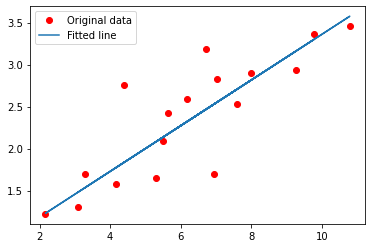

In [8]:
# Start training
with tf.Session() as sess:
    sess.run(init)
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [9]:
# Regression result